In [1]:
import numpy as np
import pandas as pd
import json
from   matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from read_layer_stats import read_layer_stats, plot_resource_heatmaps

# 1. Estimate actual resource utilization from estimated resource utilization

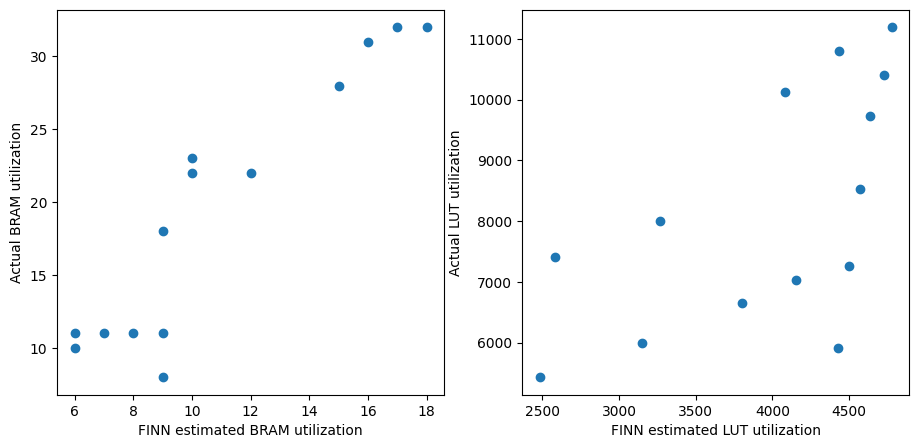

In [2]:
layer_stats_dir = './projects/layer_stats_full/'
mapping_file    = './mapping-4bit.csv'

df = pd.read_csv(mapping_file)

estimated_bram = df['Estimated_BRAM'].to_numpy().reshape(-1,1)
actual_bram    = df['Actual_BRAM'].to_numpy().reshape(-1,1)
estimated_lut  = df['Estimated_LUT'].to_numpy().reshape(-1,1)
actual_lut     = df['Actual_LUT'].to_numpy().reshape(-1,1)

plt.figure(figsize=[11,5])
plt.subplot(1,2,1)
plt.scatter(estimated_bram, actual_bram)
plt.xlabel('FINN estimated BRAM utilization')
plt.ylabel('Actual BRAM utilization')
plt.subplot(1,2,2)
plt.scatter(estimated_lut, actual_lut)
plt.xlabel('FINN estimated LUT utilization')
plt.ylabel('Actual LUT utilization')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

# Load CSV
df = pd.read_csv(mapping_file)

# Define the degree of the polynomial you want
degree = 2  # You can try 3 or higher depending on your data

# Use Estimated_BRAM and Estimated_LUT as input features
X = df[["Estimated_BRAM", "Estimated_LUT"]].values

# Target 1: Actual_BRAM
y_bram = df["Actual_BRAM"].values

# Target 2: Actual_LUT
y_lut = df["Actual_LUT"].values

model_bram = LinearRegression()
model_lut  = LinearRegression()

# Fit models
model_bram.fit(estimated_bram, y_bram)
model_lut.fit(estimated_lut, y_lut)

LinearRegression()

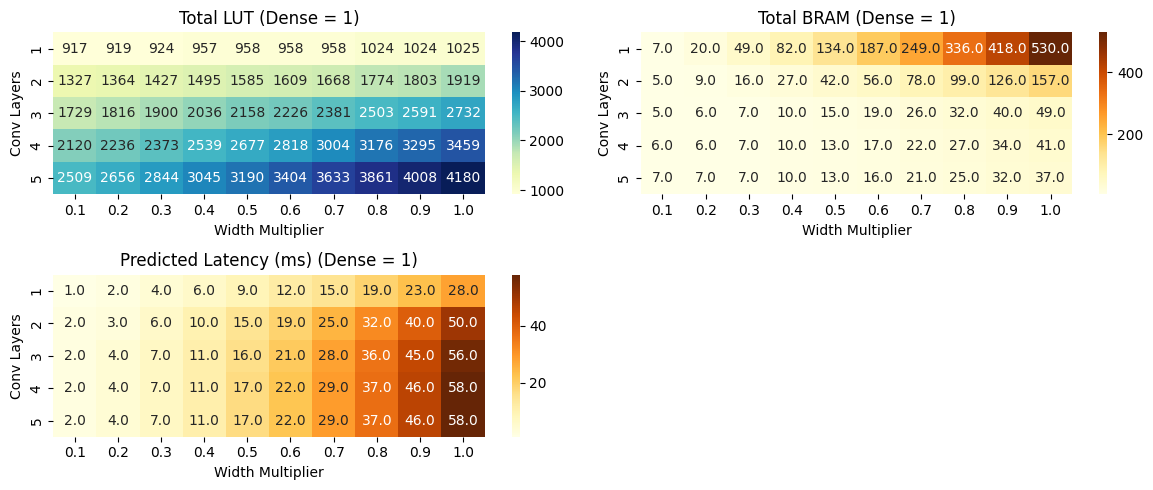

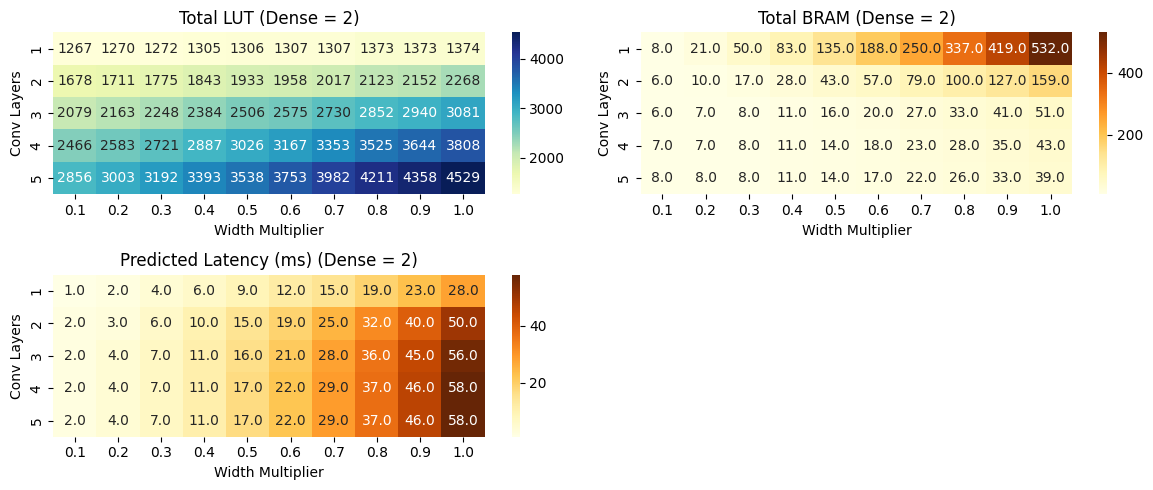

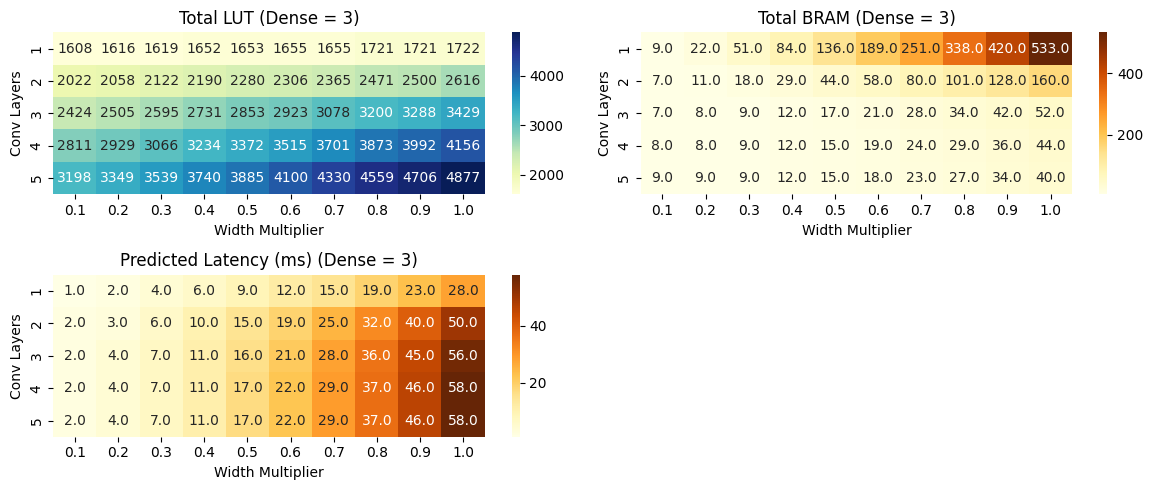

In [ ]:
stats = read_layer_stats(layer_stats_dir)
plot_resource_heatmaps(stats, model_bram=model_bram, model_lut=model_lut)

#
# Current minimum number of convolutional layers is >= 3
#